In [9]:
import pandas as pd
import cv2
import easyocr
import numpy as np
from matplotlib import pyplot as plt

In [10]:
path = "I:\\Capstone\\prototype\\405ab442ed53ef6911eeb648ed219e2.jpg"

In [20]:
# 显示图片
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey()
    cv2.destroyAllWindows()

# plt显示彩色图片
def plt_show0(img):
    b,g,r = cv2.split(img)
    img = cv2.merge([r, g, b])
    plt.imshow(img)
    plt.show()
    
# plt显示灰度图片
def plt_show(img):
    plt.imshow(img,cmap='gray')
    plt.show()  

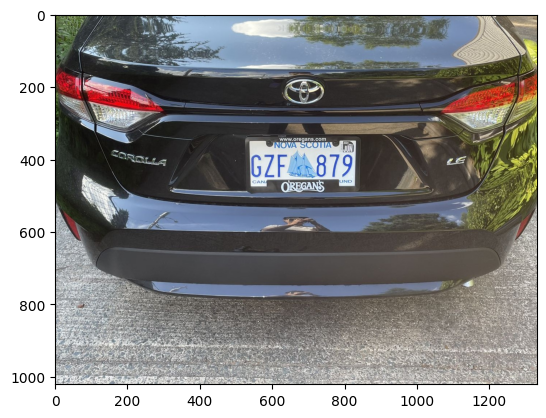

In [22]:
# 加载图片
rawImage = cv2.imread("I:\\Capstone\\prototype\\405ab442ed53ef6911eeb648ed219e2.jpg")
plt_show0(rawImage)

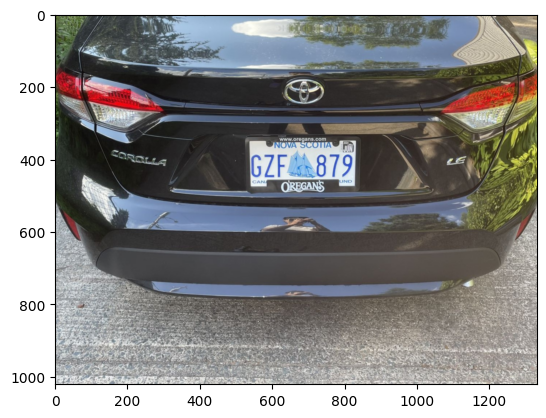

In [23]:
# 高斯去噪
image = cv2.GaussianBlur(rawImage, (3, 3), 0)
# 预览效果
plt_show0(image)

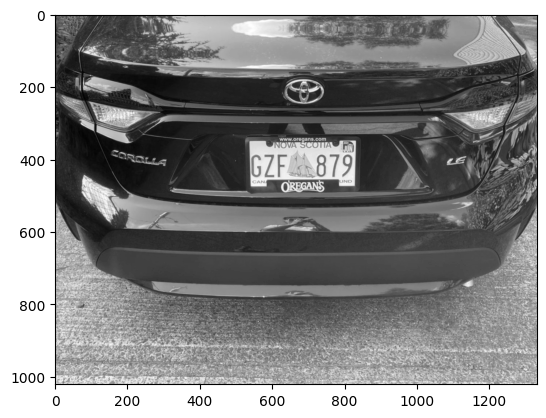

In [24]:
# 灰度处理
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt_show(gray_image)

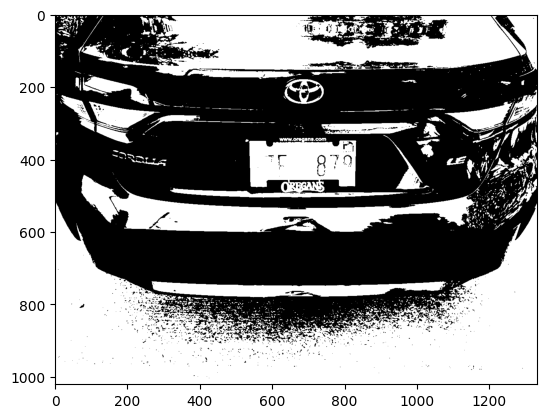

In [25]:
# 自适应阈值处理
ret, image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU)
plt_show(image)

In [26]:
# 计算二值图像黑白点的个数，处理绿牌照问题，让车牌号码始终为白色
area_white = 0
area_black = 0
height, width = image.shape
print(image.shape)
for i in range(height):
    for j in range(width):
        if image[i, j] == 255:
            area_white += 1
        else:
            area_black += 1
if area_white>area_black:
    ret, image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    plt_show(image)

(1021, 1331)


In [31]:
# 寻找轮廓
contours, _ = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 初始化车牌变量
plate = None

aspect_ratio_range = (1.8, 2.2)
min_area = (img.shape[0] * img.shape[1]) / 15

# 遍历找到的轮廓
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    area = cv2.contourArea(contour)
    aspect_ratio = float(w) / h
    
    if aspect_ratio_range[0] < aspect_ratio < aspect_ratio_range[1] and area > min_area:
        plate = img[y:y+h, x:x+w]
        break

# 检查是否找到了车牌区域
if plate is not None:
    # 显示可能的车牌区域（调试用）
    cv2.imshow('Plate Region', plate)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("No plate region found")

No plate region found
